# Prep to have real selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = '.\..\..\dataset\PSD_to_Pandas\pump_6dB_00020406_full_spectrum_128.pkl'
df = pd.read_pickle(path)

# TODO make the freq thing internal...
frequ = df.columns[df.dtypes==np.float64]
descriptive = [label for label in df.columns[df.dtypes==np.object] if not 'abnormal' in label]
target = ['abnormal']
IDs = df.ID.unique()

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[df.ID==IDs[0]][df['abnormal']==0][frequ])
x = scaler.transform(df[df.ID==IDs[0]][frequ])
y = df.abnormal[df.ID==IDs[0]]
from sklearn.decomposition import PCA
n_prin_comp = 50
pca_test = PCA(n_components=n_prin_comp, svd_solver='full')
pca_test.fit(x)
X_pca = pca_test.transform(x)

def p_pca(X_pca, n, c):
    plt.scatter(X_pca[y==n][:,0], X_pca[y==n][:,1], color=c
                        , marker='+', alpha=.3, label=n)

C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


175


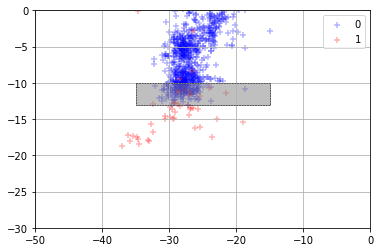

In [3]:
%matplotlib inline
%run ../cluster_visual_selector.py
#x_range = [-25,-15]
#y_range = [-20+7,-17+7]
x_range = [-35,-15]
y_range = [-13,-10]
box_idx = box_points(X_pca[:,0],X_pca[:,1], x_range, y_range)
p_pca(X_pca, 0, 'b')
p_pca(X_pca, 1, 'r')
box_outline_plot(x_range, y_range)
plt.legend()
plt.grid()
plt.xlim([-50,0])
plt.ylim([-30,0])
print(len(box_idx))
plt.show()

# Developement Zone

In [4]:
BASE_FOLDER = '../../'
%run -i ..\feature_extractor\JupyterLoad_feature_extractor.py

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation


<Figure size 432x288 with 0 Axes>

In [5]:
%matplotlib inline
BASE_FOLDER = '../../'
%run -i ..\..\utility\audition_function\JupyterLoad_audition_function.py


load audition_function_main
load audition_function_audio
load audition_function_baseplots
load audition_function_akkuplot


#### \dataset\6dB\pump\id_00\normal\00000442.wav ch:[0, 4]

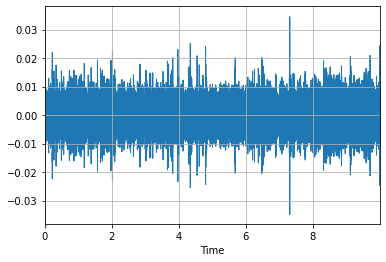

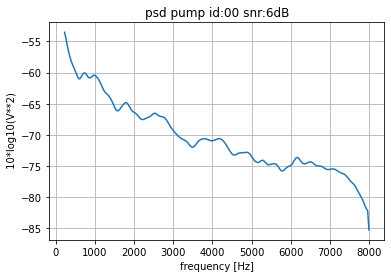

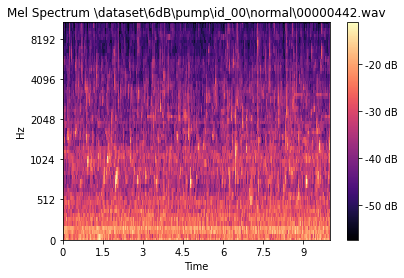

#### \dataset\6dB\pump\id_00\normal\00000453.wav ch:[0, 4]

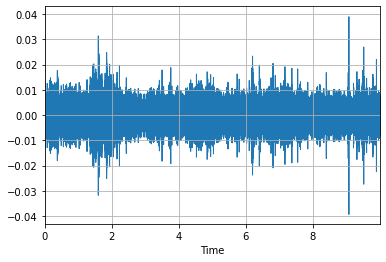

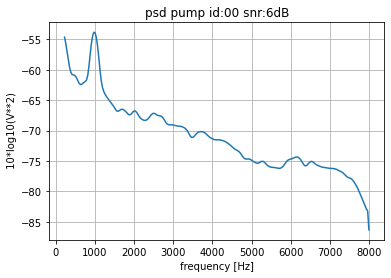

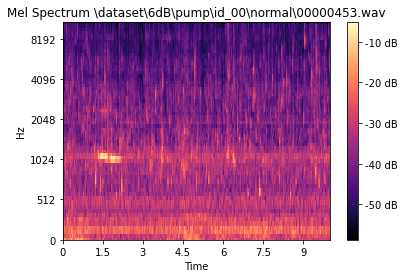

#### \dataset\6dB\pump\id_00\normal\00000456.wav ch:[0, 4]

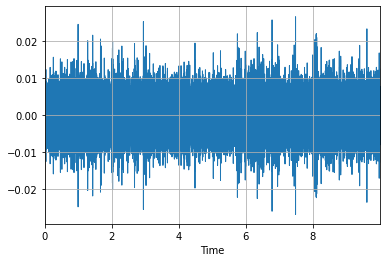

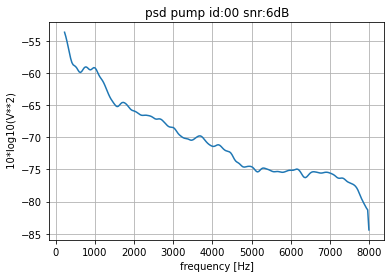

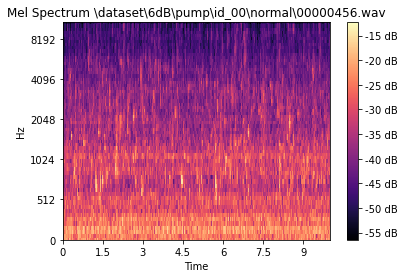

#### \dataset\6dB\pump\id_00\normal\00000463.wav ch:[0, 4]

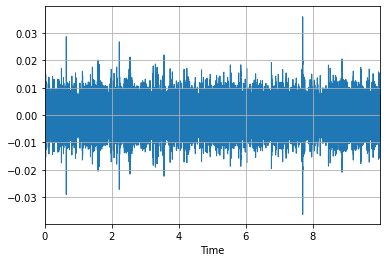

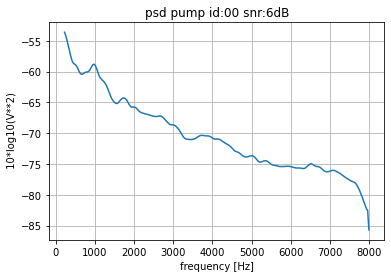

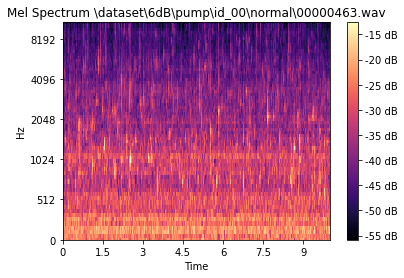

#### \dataset\6dB\pump\id_00\abnormal\00000092.wav ch:[0, 4]

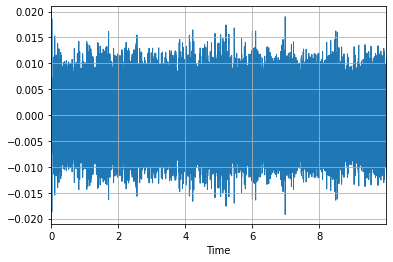

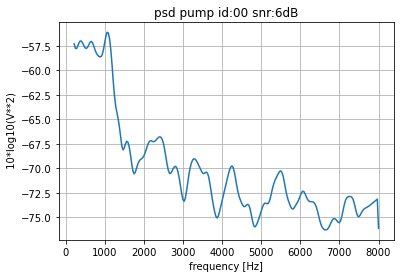

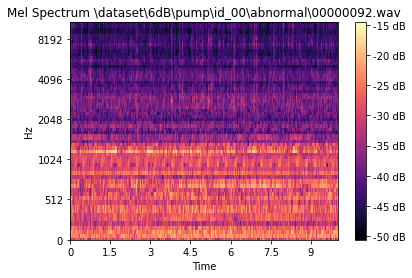

In [6]:
make_audition_list(df.iloc[box_idx][df.iloc[box_idx].abnormal==0].iloc[0:4],'../../',
                   listen=True, time_plot_ch = 0,
                   psd_from_data=True, 
                   Combine_psdfft=False, 
                   listen_every = 1, 
                   no_section=False,
                  mel_create=True)
make_audition_list(df.iloc[box_idx][df.iloc[box_idx].abnormal==1].iloc[0:1],'../../',
                   listen=True, time_plot_ch = 0,
                   psd_from_data=True, 
                   Combine_psdfft=False, 
                   listen_every = 1, 
                   no_section=False,
                  mel_create=True)

# clear output !!!!!!!!!
# clear output !!!!!!!!!
# clear output !!!!!!!!!